<a href="https://colab.research.google.com/github/allobo49/SMT2/blob/main/Quizzes/Assignment_one__2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before any classified information gets stolen. Good luck!


# Assignment part one

Airport security confiscated a laptop of a spy, which was later given to you. The laptop contains some documents that might be useful in the investigation process. You retrieve those documents and want to analyse them. Our intelligence shows that the person that we are looking for has visited the USA between Sept 2019 to Oct 2020. He is currently working undercover.


##Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/userRecords.csv")
travelRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [91]:
#print(userRecords)

num_rows_UR = len(userRecords)
num_columns_UR = userRecords.shape[1]

print("Number of rows:", num_rows_UR) #957 rows
print("Number of columns:", num_columns_UR) #10 columns

Number of rows: 957
Number of columns: 10



#### Check out the first few rows
To protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [92]:
#Visualize the first rows
first_rows_UR = userRecords.head()
print(first_rows_UR)

   Unnamed: 0.1  Unnamed: 0  UserID first_name  last_name    birthday country  \
0             0           0  317991      Lu***    Al*****  29-07-2003      AR   
1             1           1  241892     Ma****  Ro*******  10-11-1999      AR   
2             2           2  303376     Fr****     Ac****  25-07-1984      AR   
3             3           3  761992     Fr****      Go***  20-03-1970      AR   
4             4           4  373318      Jo***      Ro***  05-10-1971      AR   

  marital_status  number_of_kids               employment  
0            1.0             2.0             Web Designer  
1            1.0             0.0                   Banker  
2            1.0             0.0            Kitchen staff  
3            1.0             0.0       Teaching Assistant  
4            1.0             0.0  Administrative employee  


#### List the column/feature names

In [93]:
#Get the names of the columns
column_names_UR = userRecords.columns

print("Column names:", column_names_UR)

Column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'UserID', 'first_name', 'last_name',
       'birthday', 'country', 'marital_status', 'number_of_kids',
       'employment'],
      dtype='object')


#### Duplicates
You can check if there are duplicates in the dataset.

In [94]:
#Check for duplicate IDs
duplicate_ids_UR = userRecords.duplicated(subset=['UserID'])

if duplicate_ids_UR.any():
    print("There are duplicate IDs.")
else:
    print("There are no duplicate IDs.")

There are duplicate IDs.


Show the duplicated rows if any:

In [95]:
if duplicate_ids_UR.any():
    duplicate_rows = userRecords[duplicate_ids_UR]
    print(duplicate_rows)

     Unnamed: 0.1  Unnamed: 0  UserID first_name last_name    birthday  \
19             18          18  100684    Ma*****    Me****  17-06-1976   
165            46          46  910382      Ni***    El****  21-03-1975   
290           274         274  610518    An*****  An******  15-02-1953   

    country marital_status  number_of_kids               employment  
19       AR            NaN             0.0  Administrative employee  
165      AZ            NaN             0.0  Administrative employee  
290      DK            1.0             NaN                  Manager  


Drop the duplicate entries if any

In [96]:
# Drop duplicate rows
userRecords = userRecords.drop_duplicates()

# Print the DataFrame after dropping duplicates
print(userRecords)

     Unnamed: 0.1  Unnamed: 0  UserID first_name  last_name    birthday  \
0               0           0  317991      Lu***    Al*****  29-07-2003   
1               1           1  241892     Ma****  Ro*******  10-11-1999   
2               2           2  303376     Fr****     Ac****  25-07-1984   
3               3           3  761992     Fr****      Go***  20-03-1970   
4               4           4  373318      Jo***      Ro***  05-10-1971   
..            ...         ...     ...        ...        ...         ...   
952           949         948  218415   Bu******   Mo******  22-01-2001   
953           950         949  173906    Th*****   Mo******  06-11-1961   
954           951         950  178685    Mi*****  Bu*******  29-05-1953   
955           952         951  200865  Si*******     Na****  16-12-1962   
956           953         952  102637    Bo*****     Na****  24-02-1950   

    country marital_status  number_of_kids               employment  
0        AR            1.0   

## Spies often use false identities with fabricated data.

####This means that if some coincidences appear a statistically unusual amount of times, the data may be fabricated.

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times.

Lets first ensure that the birthday column has the correct format:


In [97]:
#Check the data type of each feature

column_data_types_UR = userRecords.dtypes

print("Data types of columns:")
print(column_data_types_UR)


Data types of columns:
Unnamed: 0.1        int64
Unnamed: 0          int64
UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status     object
number_of_kids    float64
employment         object
dtype: object


Convert the culumn "birthday" to datetime if necessary

In [98]:
#Your code here
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], format='%d-%m-%Y')
print(userRecords)

     Unnamed: 0.1  Unnamed: 0  UserID first_name  last_name   birthday  \
0               0           0  317991      Lu***    Al***** 2003-07-29   
1               1           1  241892     Ma****  Ro******* 1999-11-10   
2               2           2  303376     Fr****     Ac**** 1984-07-25   
3               3           3  761992     Fr****      Go*** 1970-03-20   
4               4           4  373318      Jo***      Ro*** 1971-10-05   
..            ...         ...     ...        ...        ...        ...   
952           949         948  218415   Bu******   Mo****** 2001-01-22   
953           950         949  173906    Th*****   Mo****** 1961-11-06   
954           951         950  178685    Mi*****  Bu******* 1953-05-29   
955           952         951  200865  Si*******     Na**** 1962-12-16   
956           953         952  102637    Bo*****     Na**** 1950-02-24   

    country marital_status  number_of_kids               employment  
0        AR            1.0             2.

Find the list of birthdays that are duplicated/reused in the dataset

In [128]:
# Group by birthday and count the occurrences
birthday_counts_UR = userRecords.groupby('birthday').size()
df_duplicated_birthdays_count = birthday_counts_UR[birthday_counts_UR > 1]
num_duplicated_birthdays=len(df_duplicated_birthdays_count)

print("The list of duplicated birthdays is the one that follows:")
print(df_duplicated_birthdays_count.index)
print(f"There is a total of {num_duplicated_birthdays} duplicated birthdays")

The list of duplicated birthdays is the one that follows:
DatetimeIndex(['1954-03-26', '1955-01-08', '1957-06-25', '1957-12-18',
               '1957-12-24', '1960-03-26', '1960-06-23', '1962-07-07',
               '1967-07-24', '1968-09-22', '1968-10-09', '1970-03-18',
               '1970-04-06', '1975-01-28', '1978-11-21', '1983-03-15',
               '1983-08-26', '1991-12-02', '1992-06-01', '1999-08-09',
               '1999-09-12', '2004-11-30'],
              dtype='datetime64[ns]', name='birthday', freq=None)
There is a total of 22 duplicated birthdays


Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [129]:
# Group by birthday and count the occurrences
birthday_counts_UR = userRecords.groupby('birthday').size()

print("The amount of users that have birthday on the same day are the following ones:")
print(birthday_counts_UR[birthday_counts_UR > 1])

The amount of users that have birthday on the same day are the following ones:
birthday
1954-03-26    2
1955-01-08    2
1957-06-25    2
1957-12-18    2
1957-12-24    2
1960-03-26    2
1960-06-23    2
1962-07-07    2
1967-07-24    2
1968-09-22    2
1968-10-09    2
1970-03-18    2
1970-04-06    2
1975-01-28    2
1978-11-21    2
1983-03-15    2
1983-08-26    2
1991-12-02    2
1992-06-01    4
1999-08-09    2
1999-09-12    2
2004-11-30    2
dtype: int64


We can consider that there is no suspicious discrepancy through birthdays.


##We have reasons to believe that the suspect works very thoroughly, so he would make sure that the fabricated data about his identity is complete in order for his operation to run smoothly.
###Therefore, we can exclude the people with incomplete information from the list of potential suspects.

You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [132]:
null_count = userRecords.isnull().sum()
records_with_null_count = userRecords.isnull().any(axis=1).sum()

print("Number of null values in each column:")
print(null_count)
print("Number of records with at least one null value:", records_with_null_count)

Number of null values in each column:
Unnamed: 0.1        0
Unnamed: 0          0
UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    102
number_of_kids    152
employment          1
dtype: int64
Number of records with at least one null value: 240


In [236]:
#Drop all records with null values
UR_cleaned = userRecords.dropna()

## Linking the user records to the flight records

We will now proceed to identify the users who were in the USA from Sept 1st, 2019 to Oct 31st, 2020.

We will combine the flight records with the user records in order to ensure that users who have been unsuspected in the previous step are not considered

In [237]:
#check the dataset with user data
print("DataFrame after dropping records with null values:")
print(UR_cleaned)

DataFrame after dropping records with null values:
     Unnamed: 0.1  Unnamed: 0  UserID  first_name  last_name   birthday  \
0               0           0  317991       Lu***    Al***** 2003-07-29   
1               1           1  241892      Ma****  Ro******* 1999-11-10   
2               2           2  303376      Fr****     Ac**** 1984-07-25   
3               3           3  761992      Fr****      Go*** 1970-03-20   
4               4           4  373318       Jo***      Ro*** 1971-10-05   
..            ...         ...     ...         ...        ...        ...   
950           947         946  458293  No********   Wi****** 1954-03-26   
952           949         948  218415    Bu******   Mo****** 2001-01-22   
953           950         949  173906     Th*****   Mo****** 1961-11-06   
954           951         950  178685     Mi*****  Bu******* 1953-05-29   
955           952         951  200865   Si*******     Na**** 1962-12-16   

    country marital_status  number_of_kids      

In [238]:
#check the dataset with the flight records
print(travelRecords)

       Unnamed: 0 flightName departure destination        date  userID
0               0    KX65826        AR          IT  20-01-2010  317991
1               1    CL12336        IT          MT  16-06-2010  317991
2               2   YN106988        MT          SE  08-05-2011  317991
3               3    CB58289        SE          EE  08-11-2011  317991
4               4   SX625101        EE          AZ  17-11-2011  317991
...           ...        ...       ...         ...         ...     ...
25394       25398    BM96341        PR          DE  31-10-2020  102637
25395       25399   SA710311        DE          CR  14-09-2021  102637
25396       25400    BB83468        CR          DK  22-11-2021  102637
25397       25401   ZS810988        DK          ES  05-09-2022  102637
25398       25402   NZ108647        ES          SE  14-02-2023  102637

[25399 rows x 6 columns]


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*
The result should contain the features flightName, Departure, Arrival,  Date, UserID, first_name, last_name, etc...

We can now drop the travel values for users who have been removed from the suspect list prior. (The ones that had missing values)


In [239]:
UR_cleaned = UR_cleaned.rename(columns={'UserID': 'userID'})
merged_TR = pd.merge(travelRecords, UR_cleaned, on='userID', how='inner')
print(merged_TR)

       Unnamed: 0_x flightName departure destination        date  userID  \
0                 0    KX65826        AR          IT  20-01-2010  317991   
1                 1    CL12336        IT          MT  16-06-2010  317991   
2                 2   YN106988        MT          SE  08-05-2011  317991   
3                 3    CB58289        SE          EE  08-11-2011  317991   
4                 4   SX625101        EE          AZ  17-11-2011  317991   
...             ...        ...       ...         ...         ...     ...   
19032         25370    IY61324        PL          ZA  01-09-2020  200865   
19033         25371    JO46672        ZA          DZ  20-07-2021  200865   
19034         25372  HX1014810        DZ          CR  22-01-2022  200865   
19035         25373   DL869109        CR          GT  28-04-2022  200865   
19036         25374    XK61479        GT          KR  24-03-2023  200865   

       Unnamed: 0.1  Unnamed: 0_y first_name last_name   birthday country  \
0         

Let's now identify the user who has travelled to the United States (US) between the 1st of september 2019 and the 31st of october 2020

*Note that the travel date is not in datetime format*

In [240]:
merged_TR['year'] = pd.to_datetime(merged_TR['date'], format='%d-%m-%Y').dt.year
merged_TR_sorted = merged_TR.sort_values(by=['userID', 'date'], ascending=[True, True])

print(merged_TR_sorted)

       Unnamed: 0_x flightName departure destination        date  userID  \
17248         22988   WN271066        GB          SE  01-08-2020   96249   
17237         22977    VN34319        FI          ES  02-05-2014   96249   
17240         22980    IG65221        US          BE  02-09-2015   96249   
17229         22969   GK102545        PL          IE  03-03-2011   96249   
17236         22976   YB109328        CO          FI  03-10-2013   96249   
...             ...        ...       ...         ...         ...     ...   
1496           2405   NR716910        CA          BE  23-12-2011  957997   
1493           2402    YI97939        TR          DE  24-10-2010  957997   
1516           2425   RX810748        CO          BE  26-10-2020  957997   
1513           2422    CV66585        BD          NL  28-11-2018  957997   
1503           2412   LP397810        SG          ZA  30-08-2014  957997   

       Unnamed: 0.1  Unnamed: 0_y  first_name last_name   birthday country  \
17248    

In [242]:
merged_TR_sorted['date'] = pd.to_datetime(merged_TR_sorted['date'], format='%d-%m-%Y')

user_ids = merged_TR_sorted['userID'].unique()
user_ids_meeting_criteria = []

for user_id in user_ids:

    user_records = merged_TR_sorted[merged_TR_sorted['userID'] == user_id]

    if user_records.empty:
      continue

    if 'US' not in user_records['destination'].unique():
      continue

    us_trip_date = user_records[(user_records['destination'] == 'US') & (user_records['date'] <= pd.Timestamp('2019-09-01'))]['date'].max()

    if pd.isna(us_trip_date):
        continue

    records_after_us_trip = user_records[(user_records['date'] > us_trip_date) & (user_records['date'] <= '2020-10-31')]

    if records_after_us_trip.empty:
      user_ids_meeting_criteria.append(user_id)

print("List of UserIDs meeting the criteria:")
print(user_ids_meeting_criteria)

for user_id in user_ids_meeting_criteria:
    user_records = merged_TR_sorted[merged_TR_sorted['userID'] == user_id].sort_values(by=['userID', 'date'], ascending=[True, True])
    print(f"Records for UserID: {user_id}")
    print(user_records)
    print("\n")

List of UserIDs meeting the criteria:
[832011]
Records for UserID: 832011
       Unnamed: 0_x flightName departure destination       date  userID  \
18414         24550    AK19183        LU          SE 2010-11-01  832011   
18415         24551  LX1061108        SE          BD 2011-02-28  832011   
18416         24552    BP14885        BD          NL 2011-07-14  832011   
18417         24553    BO81961        NL          RU 2012-04-28  832011   
18418         24554    OG51281        RU          US 2012-07-13  832011   
18419         24555   FS619105        US          CO 2012-08-03  832011   
18420         24556    WV17416        CO          SG 2013-02-18  832011   
18421         24557    MZ12194        SG          CR 2013-04-23  832011   
18422         24558    RY88235        CR          LT 2013-10-13  832011   
18423         24559    BL31288        LT          BG 2014-02-23  832011   
18424         24560    TQ31792        BG          CZ 2014-06-20  832011   
18425         24561   BC10

## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects

Let's first make a pie chart to visualise the different employments held from the current suspects:

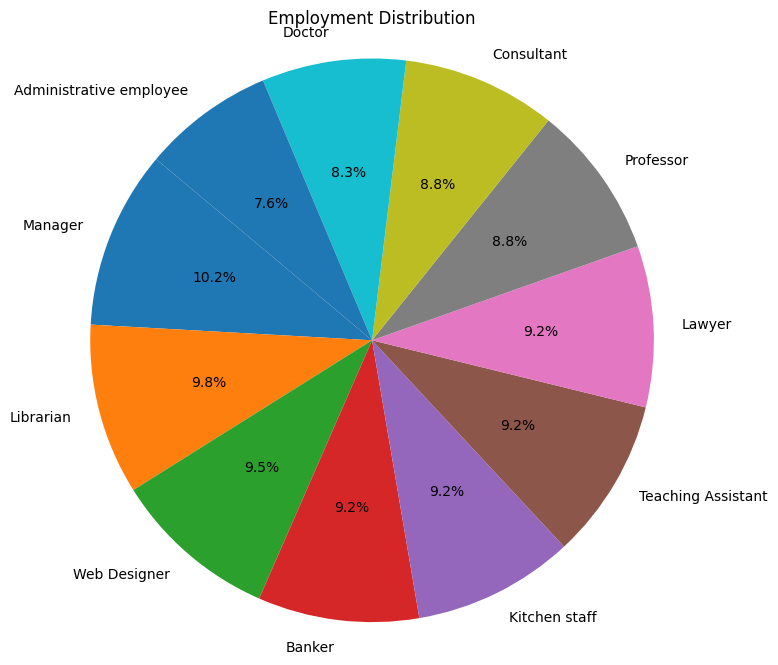

In [241]:
plt.figure(figsize=(8, 8))
UR_cleaned['employment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Employment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('')  # Remove the ylabel
plt.show()

## Journey length

Suisse Impossible Mission Force believes the rogue agent is an outlier from his declared category based on the days spent there compared to others.

We can use boxplots to identify outliers per employment category.

Let's first make two tables, one with the date of arrival and one with the date of departure. You can reuse your previous dataset and identify the arrival and departure date using the destination and departure features on the dataset. Note that the arrival and the departure dates should fall between the time period when the suspect is belived to have visited the US - between Sept 2019 to Oct 2020.

In [334]:
arrival_us = merged_TR_sorted[(merged_TR_sorted['destination'] == 'US') &
                                (merged_TR_sorted['date'] >= '2019-09-01') &
                              (merged_TR_sorted['date'] < '2020-10-31')].rename(columns={'date': 'date of arrival'})
print("Table for Arrivals to US:")
print(arrival_us)


departure_us = merged_TR_sorted[(merged_TR_sorted['departure'] == 'US') &
                                (merged_TR_sorted['date'] <= '2020-10-31')&
                                (merged_TR_sorted['date'] > '2019-09-01')].rename(columns={'date': 'date of departure'})
print("\nTable for Departures from US:")
print(departure_us)

Table for Arrivals to US:
       Unnamed: 0_x flightName departure destination date of arrival  userID  \
18116         24196    PK41837        PL          US      2020-07-19  123699   
14639         19634    HA26526        HU          US      2019-11-10  139646   
2289           3454   TF469810        IT          US      2020-03-17  220420   
463             638  OO3731010        CA          US      2020-04-10  255830   
4897           7177    HX23943        CO          US      2020-10-10  267733   
7913          11309    BF79684        RU          US      2020-02-16  287607   
2702           4036    MX97137        FR          US      2020-07-23  297653   
18283         24390    IH35877        IT          US      2020-10-07  409055   
9990          13874   OS610439        JP          US      2020-04-23  410319   
8452          11956   YO910418        AR          US      2020-08-19  411537   
8979          12512    IU77244        CO          US      2020-09-20  424791   
17222         

We can keep on both these tables the user ID, employment, and departure date / arrival date.

In [335]:
arrival_us = arrival_us.loc[:,['userID', 'employment', 'date of arrival']]
print("Table for Arrivals to US:")
print(arrival_us)

departure_us = departure_us.loc[:,['userID', 'employment', 'date of departure']]
print("\nTable for Departures from US:")
print(departure_us)

Table for Arrivals to US:
       userID               employment date of arrival
18116  123699                   Lawyer      2020-07-19
14639  139646                   Doctor      2019-11-10
2289   220420             Web Designer      2020-03-17
463    255830                Professor      2020-04-10
4897   267733            Kitchen staff      2020-10-10
7913   287607            Kitchen staff      2020-02-16
2702   297653                   Lawyer      2020-07-23
18283  409055                Librarian      2020-10-07
9990   410319                   Lawyer      2020-04-23
8452   411537             Web Designer      2020-08-19
8979   424791       Teaching Assistant      2020-09-20
17222  428951            Kitchen staff      2020-05-28
5349   429697  Administrative employee      2020-06-26
7588   434361            Kitchen staff      2020-10-06
246    468560                   Lawyer      2020-07-16
7451   481578  Administrative employee      2020-05-03
12165  556033             Web Designer 

We can now join the two tables on user ID

In [339]:
merged_tables = arrival_us.merge(departure_us, on='userID', how='inner')

duplicated_rows = merged_tables[merged_tables.duplicated(subset='userID', keep=False)]

if not duplicated_rows.empty:
    print("The following users did more that 1 trip to US in the analyzed period [01-09-2019 to 31-10-2020]")
    print(duplicated_rows)

print("Filtered Merged table:")
display(merged_tables)

Filtered Merged table:


,userID,employment_x,date of arrival,employment_y,date of departure
0,139646,Doctor,2019-11-10,Doctor,2020-07-29
1,255830,Professor,2020-04-10,Professor,2020-10-07
2,287607,Kitchen staff,2020-02-16,Kitchen staff,2020-06-30
3,424791,Teaching Assistant,2020-09-20,Teaching Assistant,2020-10-06
4,428951,Kitchen staff,2020-05-28,Kitchen staff,2020-08-01
5,481578,Administrative employee,2020-05-03,Administrative employee,2020-07-02
6,556033,Web Designer,2019-10-13,Web Designer,2019-10-22
7,581969,Librarian,2019-10-15,Librarian,2020-07-05
8,628854,Manager,2020-07-29,Manager,2020-09-11
9,638911,Kitchen staff,2020-01-09,Kitchen staff,2020-06-26


We can now create a new feature called journey_length representing the  departure date - arrival date

*Sidenote: if you get negative journey length, what would be your explanation to that?*


In [337]:
merged_tables['date of arrival'] = pd.to_datetime(merged_tables['date of arrival'])
merged_tables['date of departure'] = pd.to_datetime(merged_tables['date of departure'])

merged_tables['journey_length'] = merged_tables['date of departure'] - merged_tables['date of arrival']

print("Updated Merged table:")
print(merged_tables)

Updated Merged table:
    userID             employment_x date of arrival             employment_y  \
0   139646                   Doctor      2019-11-10                   Doctor   
1   255830                Professor      2020-04-10                Professor   
2   287607            Kitchen staff      2020-02-16            Kitchen staff   
3   424791       Teaching Assistant      2020-09-20       Teaching Assistant   
4   428951            Kitchen staff      2020-05-28            Kitchen staff   
5   481578  Administrative employee      2020-05-03  Administrative employee   
6   556033             Web Designer      2019-10-13             Web Designer   
7   581969                Librarian      2019-10-15                Librarian   
8   628854                  Manager      2020-07-29                  Manager   
9   638911            Kitchen staff      2020-01-09            Kitchen staff   
10  679196                Librarian      2020-01-23                Librarian   
11  710764        

We can now create the boxplots

<Figure size 1000x600 with 0 Axes>

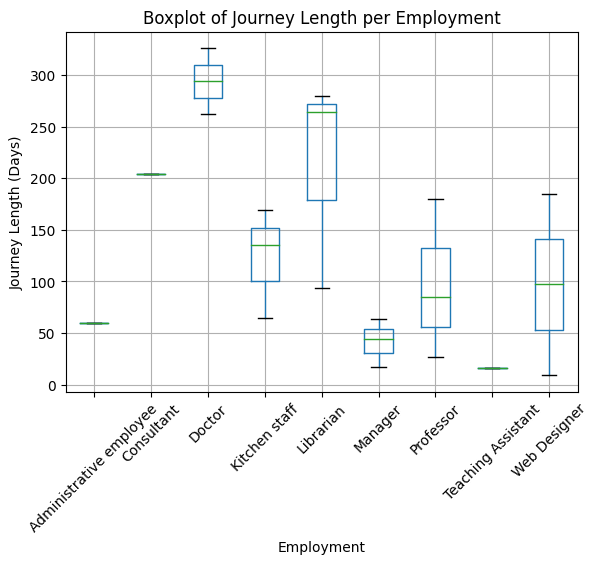

In [338]:
merged_tables['journey_length_days'] = merged_tables['journey_length'].dt.days

plt.figure(figsize=(10, 6))
merged_tables.boxplot(column='journey_length_days', by='employment_y')
plt.xlabel('Employment')
plt.ylabel('Journey Length (Days)')
plt.title('Boxplot of Journey Length per Employment')

plt.xticks(rotation=45)

plt.show()

##SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...